In [2]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import skew, kurtosis, norm
from sklearn.cluster import DBSCAN, HDBSCAN
from sklearn.preprocessing import quantile_transform
import psutil
%matplotlib inline

In [2]:
datadir = '/datax/scratch/benjb/'

freqs = np.load(datadir + 'C23_L_frequencies.npy', allow_pickle=True)
drifts = np.load(datadir + 'C23_L_driftrates.npy', allow_pickle=True)
snrs = np.load(datadir + 'C23_L_snrs.npy', allow_pickle=True)

In [47]:
datadir = '/datax/scratch/benjb/'

batch_injected = np.load(datadir + 'injected_params.npy', allow_pickle=True)

In [48]:
print(batch_injected[0].shape)

(2, 9)


In [49]:
injected_param_array = []
for p in batch_injected:
    good_params = p[-1]
    injected_param_array.append(good_params)

In [53]:
print(np.array(injected_param_array).shape)

(10, 9)


In [57]:
import glob

dats = glob.glob('/datax/scratch/benjb/injections/*_inserted.dat')

freqs = []
drifts = []
snrs = []

for dat in dats:
    df = pd.read_table(dat, sep='\s+', 
                  names=['Top_Hit_#','Drift_Rate','SNR',
                         'Uncorrected_Frequency','Corrected_Frequency',
                         'Index', 'freq_start', 'freq_end', 'SEFD', 
                         'SEFD_freq', 'Coarse_Channel_Number',
                         'Full_number_of_hits'], skiprows=9)
    
    freq = df['Uncorrected_Frequency'].values[-1]
    drift = df['Drift_Rate'].values[-1]
    snr = df['SNR'].values[-1]
    
    freqs.append(freq)
    drifts.append(drift)
    snrs.append(snr)

<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_271438/1529000788.py:10: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_table(dat, sep='\s+',


In [61]:
full_injected_params = np.hstack((
        np.transpose(np.array([freqs])),
        np.transpose(np.array([drifts])),
        np.transpose(np.array([snrs])),
        np.array(injected_param_array)
    ))

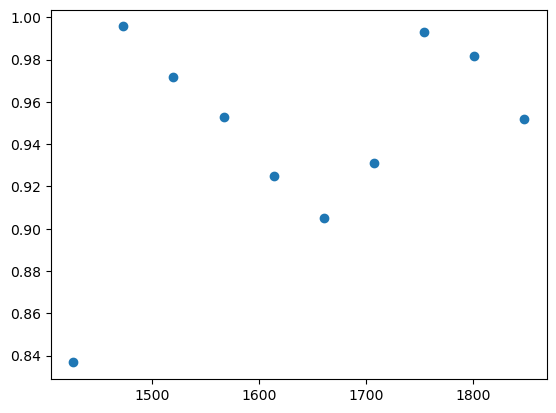

In [66]:
plt.scatter(full_injected_params[:,0], full_injected_params[:,5])
plt.show()

In [67]:
np.save('/datax/scratch/benjb/C23_L_full_injected_params.npy', full_injected_params)

In [3]:
batch_1 = np.load(datadir + 'C23_L_batch_1_params.npy', allow_pickle=True)
batch_2 = np.load(datadir + 'C23_L_batch_2_params.npy', allow_pickle=True)
batch_3 = np.load(datadir + 'C23_L_batch_3_params.npy', allow_pickle=True)
batch_4 = np.load(datadir + 'C23_L_batch_4_params.npy', allow_pickle=True)
batch_5 = np.load(datadir + 'C23_L_batch_5_params.npy', allow_pickle=True)
batch_6 = np.load(datadir + 'C23_L_batch_6_params.npy', allow_pickle=True)

In [4]:
batch_1_triad = np.load(datadir + 'batch_1_triad.npy', allow_pickle=True)
batch_2_triad = np.load(datadir + 'batch_2_triad.npy', allow_pickle=True)
batch_3_triad = np.load(datadir + 'batch_3_triad.npy', allow_pickle=True)
batch_4_triad = np.load(datadir + 'batch_4_triad.npy', allow_pickle=True)
batch_5_triad = np.load(datadir + 'batch_5_triad.npy', allow_pickle=True)
batch_6_triad = np.load(datadir + 'batch_6_triad.npy', allow_pickle=True)

In [5]:
triad_array = np.vstack((
    batch_1_triad,
    batch_2_triad,
    batch_3_triad,
    batch_4_triad,
    batch_5_triad,
    batch_6_triad
))

In [6]:
p_array = np.vstack((np.concatenate(batch_1), 
                 np.concatenate(batch_2),
                 np.concatenate(batch_3),
                 np.concatenate(batch_4),
                 np.concatenate(batch_5),
                 np.concatenate(batch_6)
                 ))

In [7]:
print(triad_array.shape)
print(p_array.shape)

(3247546, 3)
(3247546, 9)


In [8]:
param_array_uncut = np.hstack((triad_array, p_array))
print(param_array_uncut.shape)

(3247546, 12)


In [10]:
batch_1_sigbw = np.load(datadir + 'batch_1_sigbws.npy', allow_pickle=True)
batch_2_sigbw = np.load(datadir + 'batch_2_sigbws.npy', allow_pickle=True)
batch_3_sigbw = np.load(datadir + 'batch_3_sigbws.npy', allow_pickle=True)
batch_4_sigbw = np.load(datadir + 'batch_4_sigbws.npy', allow_pickle=True)
batch_5_sigbw = np.load(datadir + 'batch_5_sigbws.npy', allow_pickle=True)
batch_6_sigbw = np.load(datadir + 'batch_6_sigbws.npy', allow_pickle=True)

In [14]:
sigbw_vec = np.concatenate((
    batch_1_sigbw[:,1],
    batch_2_sigbw[:,1],
    batch_3_sigbw[:,1],
    batch_4_sigbw[:,1],
    batch_5_sigbw[:,1],
    batch_6_sigbw[:,1]
))
print(sigbw_vec.shape)

(3247712,)


In [18]:
3247712-3247546

166

In [21]:
print(len(param_array_uncut[:,0]))
print(len(np.unique(param_array_uncut[:,0])))

print(len(param_array_uncut[:,0]) - len(np.unique(param_array_uncut[:,0])))

3247546
2580192
667354


In [24]:
print(param_array_uncut[:40,0])

[2250.899676 2250.599782 2250.48744  2250.33333  2250.299886 2250.283584
 2250.243767 2250.187488 2250.166659 2250.147772 2250.131245 2250.112428
 2250.097547 2250.083329 2250.056219 2249.943778 2249.916669 2249.90245
 2249.887569 2249.868752 2249.852226 2249.833338 2249.812509 2249.756231
 2249.716414 2249.700111 2249.666667 2249.512557 2249.400215 2249.100321
 2248.416705 2248.208358 2246.333394 2239.806752 2236.877065 2224.198777
 2223.347684 2223.167233 2223.152282 2223.146057]


In [44]:
process = psutil.Process()

print(process.memory_info().rss)

good_freqs = param_array_uncut[:,0]
bad_freqs = np.concatenate((
    batch_1_sigbw[:,0],
    batch_2_sigbw[:,0],
    batch_3_sigbw[:,0],
    batch_4_sigbw[:,0],
    batch_5_sigbw[:,0],
    batch_6_sigbw[:,0]
))

#good_freqs = np.array([0,1,2,3,4,5,6,7,8,9])
#bad_freqs = np.array([0,1,1.5,1.8,2,2.3,3,4,5,6,7,8,8.5,9])
#bad_sigbw_vec = np.array([0,1,1.5,1.8,2,2.3,3,4,5,6,7,8,8.5,9])

#print(good_freqs)
#print(bad_freqs)
print(len(good_freqs))
print(len(bad_freqs))

good_sigbw_vec = []
bad_sigbw_vec = np.copy(sigbw_vec)

for ii, good_freq in enumerate(good_freqs):
    if ii % 1000 == 0:
        print(f'Starting frequency #{ii}')
        print(process.memory_info().rss)
    if bad_freqs[ii] == good_freqs[ii]:
        continue
    else:
        while True:
            if bad_freqs[ii] == good_freqs[ii]:
                break
            else:
                bad_sigbw_vec = np.delete(bad_sigbw_vec, ii)
                bad_freqs = np.delete(bad_freqs, ii)
                print('Bad value deleted!')
                #print()
                #print(bad_sigbw_vec)
                continue
    #idx = bad_freqs.index(good_freq)
    #if idx > 0:
    #    print(f'{idx} bad signal bandwidths cut!')
    #good_sigbw = bad_sigbw_vec[idx]
    #good_sigbw_vec.append(good_sigbw)
    #bad_freqs = bad_freqs[idx+1:]
    #bad_sigbw_vec = bad_sigbw_vec[idx+1:]

print(len(bad_sigbw_vec))
#print(good_freqs)
#print(bad_sigbw_vec)

1804247040
3247546
3247712
Starting frequency #0
1830076416
Starting frequency #1000
1830076416
Starting frequency #2000
1830076416
Starting frequency #3000
1830076416
Starting frequency #4000
1830076416
Starting frequency #5000
1830076416
Starting frequency #6000
1830076416
Starting frequency #7000
1830076416
Starting frequency #8000
1830076416
Starting frequency #9000
1830076416
Starting frequency #10000
1830076416
Starting frequency #11000
1830076416
Starting frequency #12000
1830076416
Starting frequency #13000
1830076416
Starting frequency #14000
1830076416
Starting frequency #15000
1830076416
Starting frequency #16000
1830076416
Starting frequency #17000
1830076416
Starting frequency #18000
1830076416
Starting frequency #19000
1830076416
Starting frequency #20000
1830076416
Starting frequency #21000
1830076416
Starting frequency #22000
1830076416
Starting frequency #23000
1830076416
Starting frequency #24000
1830076416
Starting frequency #25000
1830076416
Starting frequency #2600

In [46]:
print(np.unique(np.array(bad_freqs)-np.array(good_freqs)))

[0.]


In [49]:
param_array_uncut = np.delete(param_array_uncut, 11, 1)
print(param_array_uncut.shape)

(3247546, 11)


In [53]:
param_array_uncut = np.hstack((param_array_uncut, np.transpose([bad_sigbw_vec])))
print(param_array_uncut.shape)

(3247546, 12)


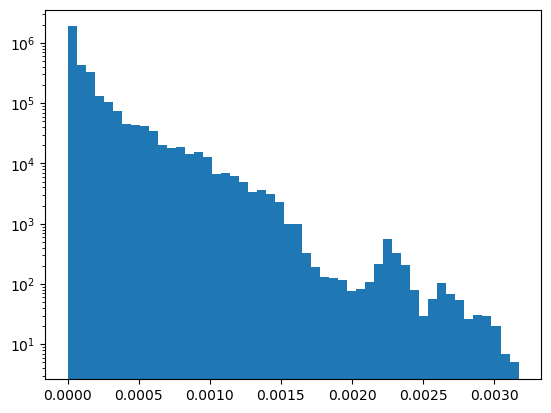

In [54]:
plt.hist(param_array_uncut[:,11], bins=50)
plt.yscale('log')
plt.show()

In [32]:
print(len(good_sigbw_vec))
print(len(bad_sigbw_vec))

31254
3216458


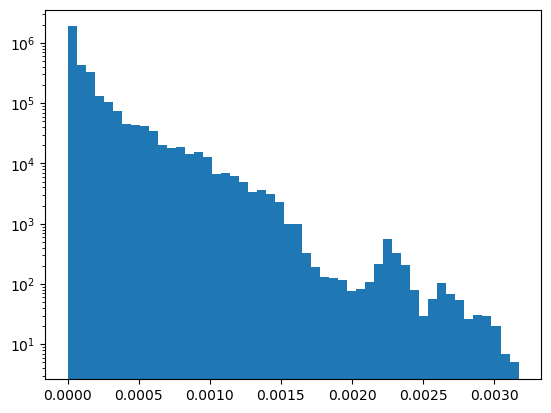

In [17]:
plt.hist(sigbw_vec, bins=50)
plt.yscale('log')
plt.show()

In [55]:
uncut_freqs = param_array_uncut[:,0]
param_array = param_array_uncut[np.where(
    ((uncut_freqs > 1100) & (uncut_freqs < 1200)) | 
    ((uncut_freqs > 1340) & (uncut_freqs < 1900))
    )]

In [65]:
print(param_array.shape)

(2185987, 12)


In [66]:
print(len(freqs))
print(len(freqs) - len(param_array))

2185987
0


In [67]:
2186151 - 2185987

164

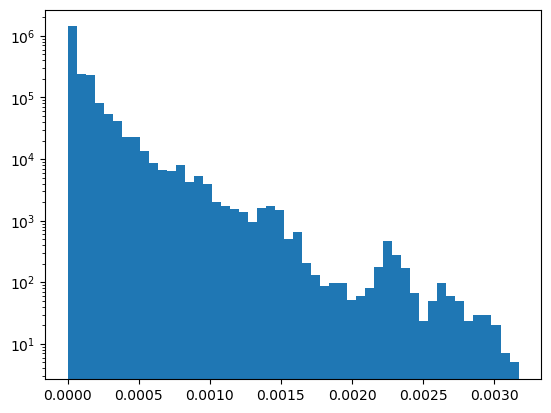

In [57]:
plt.hist(param_array[:,11], bins=50)
plt.yscale('log')
plt.show()

In [3]:
np.save('/datax/scratch/benjb/C23_L_full_param_array.npy', param_array)

NameError: name 'param_array' is not defined

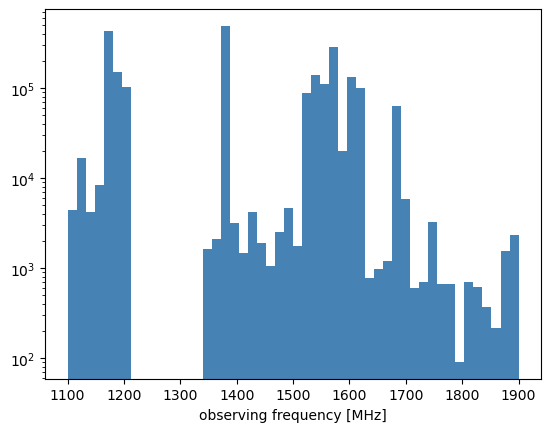

In [13]:
#plt.hist(freqs, range=[1100, 1900], histtype='step', color='steelblue', bins=50)
plt.hist(param_array[:,0], range=[1100, 1900], color='steelblue', bins=50)
plt.yscale('log')
plt.xlabel('observing frequency [MHz]')
plt.show()

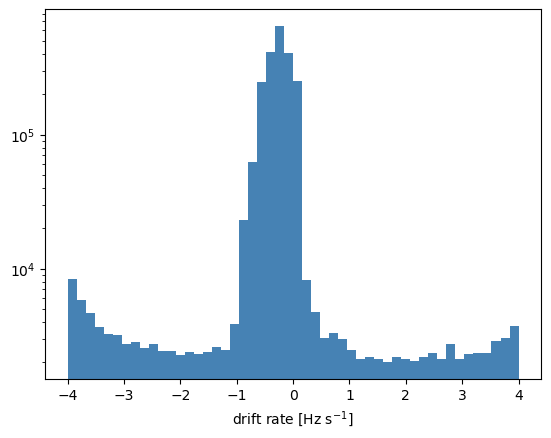

In [54]:
#plt.hist(drifts, range=[-4, 4], color='steelblue', bins=50)
plt.hist(param_array[:,1], range=[-4, 4], color='steelblue', bins=50)
plt.yscale('log')
plt.xlabel(r'drift rate [Hz s$^{-1}$]')
plt.show()

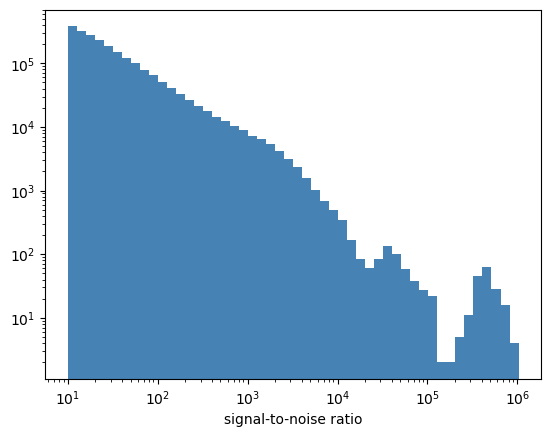

In [55]:
snrs = snrs.astype(float)
snrs = param_array[:, 2]

hist, bins = np.histogram(snrs, bins=50)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))

plt.hist(snrs, color='steelblue', bins=logbins)

#plt.hist(np.log10(snrs.astype(float)), bins=50)
plt.xlabel('signal-to-noise ratio')
plt.xscale('log')
plt.yscale('log')
plt.show()

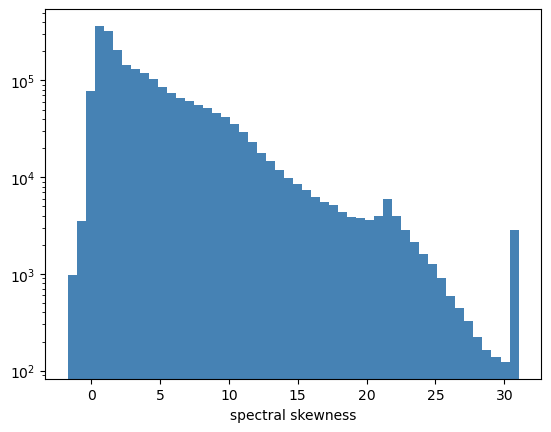

In [66]:
plt.hist(param_array[:,3], color='steelblue', bins=50)
plt.yscale('log')
plt.xlabel(r'spectral skewness')
plt.show()

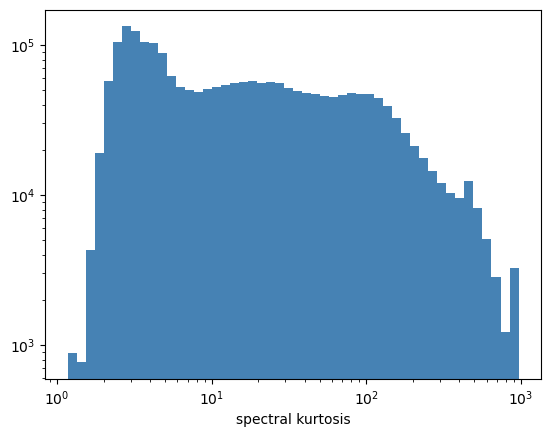

In [67]:
hist, bins = np.histogram(param_array[:,4], bins=50)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))

plt.hist(param_array[:,4], color='steelblue', bins=logbins)

#plt.hist(param_array[:,4], color='steelblue', bins=50)
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'spectral kurtosis')
plt.show()

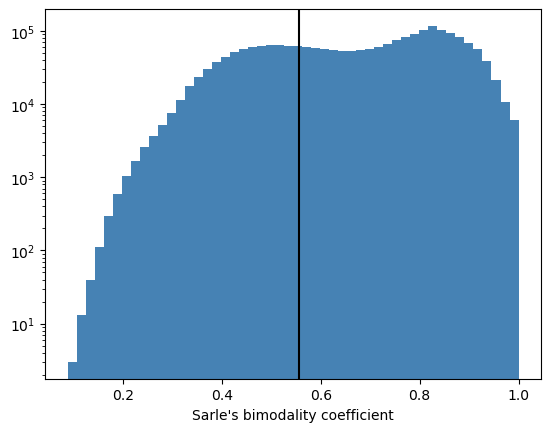

In [68]:
plt.hist(param_array[:,5], color='steelblue', bins=50)
plt.axvline(5/9, color='k')
plt.yscale('log')
plt.xlabel('Sarle\'s bimodality coefficient')
plt.show()

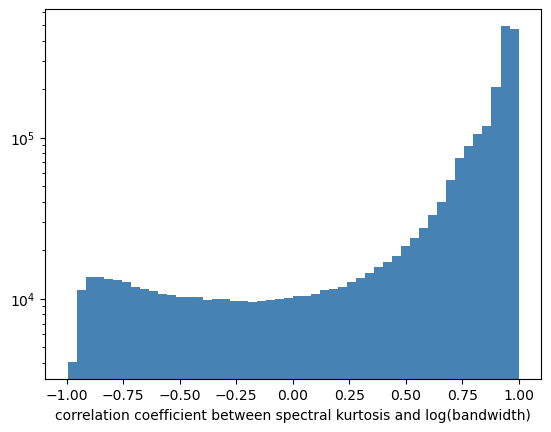

In [71]:
plt.hist(param_array[:,6], color='steelblue', bins=50)
plt.yscale('log')
plt.xlabel('correlation coefficient between spectral kurtosis and log(bandwidth)')
plt.show()

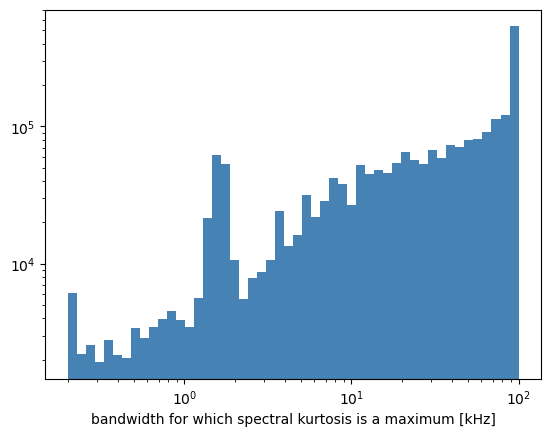

In [81]:
hist, bins = np.histogram(param_array[:,7]*1e3, bins=50)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))

plt.hist(param_array[:,7]*1e3, color='steelblue', bins=logbins)

#plt.hist(param_array[:,7]*1e3, color='steelblue', bins=50)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('bandwidth for which spectral kurtosis is a maximum [kHz]')
plt.show()

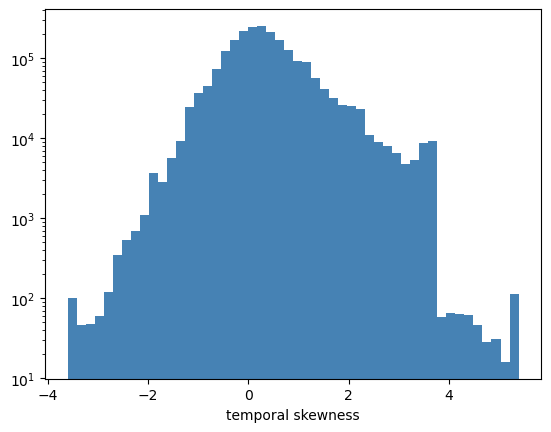

In [79]:
plt.hist(param_array[:,8], color='steelblue', bins=50)
plt.yscale('log')
plt.xlabel('temporal skewness')
plt.show()

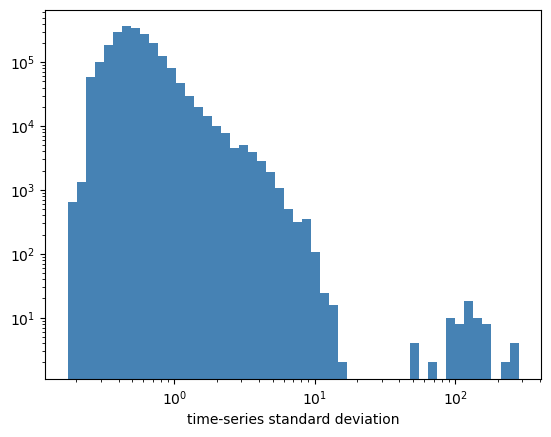

In [83]:
hist, bins = np.histogram(param_array[:,9], bins=50)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))

plt.hist(param_array[:,9], color='steelblue', bins=logbins)

plt.yscale('log')
plt.xscale('log')
plt.xlabel('time-series standard deviation')
plt.show()

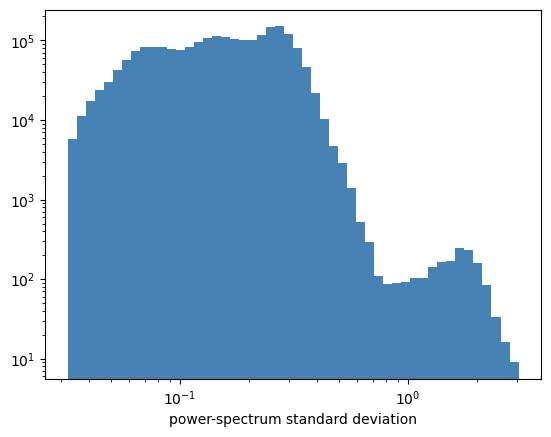

In [84]:
hist, bins = np.histogram(param_array[:,10], bins=50)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))

plt.hist(param_array[:,10], color='steelblue', bins=logbins)

plt.yscale('log')
plt.xscale('log')
plt.xlabel('power-spectrum standard deviation')
plt.show()

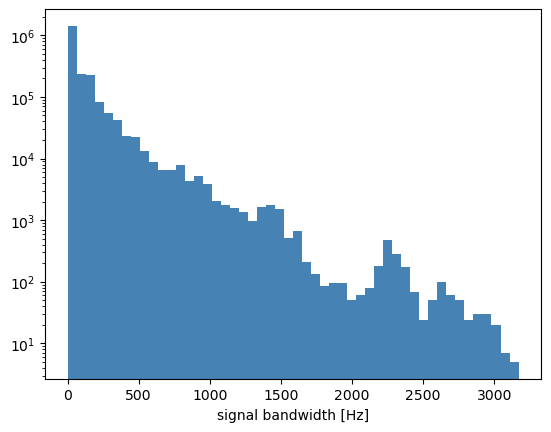

In [60]:
plt.hist(param_array[:,11]*1e6, color='steelblue', bins=50)
plt.yscale('log')
plt.xlabel('signal bandwidth [Hz]')
plt.show()

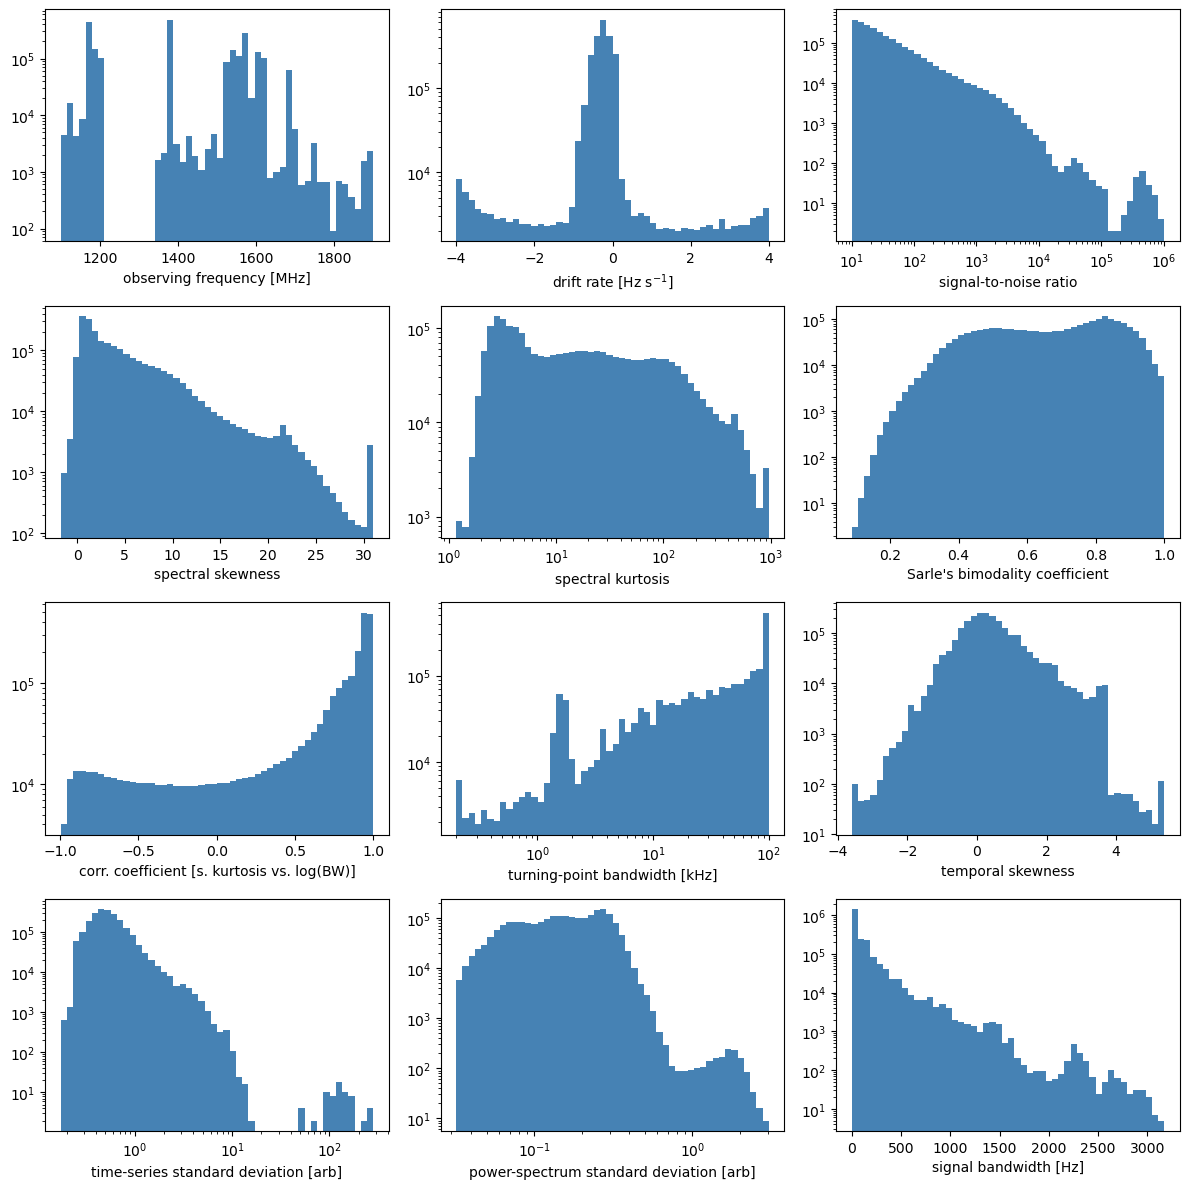

In [61]:
fig, axs = plt.subplots(4, 3, figsize=(12, 12))

# 0: Observing Frequency
axs[0,0].hist(param_array[:,0], range=[1100, 1900], color='steelblue', bins=50)
axs[0,0].set_yscale('log')
axs[0,0].set_xlabel('observing frequency [MHz]')

# 1: Drift Rate
axs[0,1].hist(param_array[:,1], range=[-4, 4], color='steelblue', bins=50)
axs[0,1].set_yscale('log')
axs[0,1].set_xlabel(r'drift rate [Hz s$^{-1}$]')

# 2: SNR
snrs = param_array[:, 2]
hist, bins = np.histogram(snrs, bins=50)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
axs[0,2].hist(snrs, color='steelblue', bins=logbins)
axs[0,2].set_xlabel('signal-to-noise ratio')
axs[0,2].set_xscale('log')
axs[0,2].set_yscale('log')

# 3: spectral skewness
axs[1,0].hist(param_array[:,3], color='steelblue', bins=50)
axs[1,0].set_yscale('log')
axs[1,0].set_xlabel(r'spectral skewness')

# 4: spectral kurtosis
hist, bins = np.histogram(param_array[:, 4], bins=50)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
axs[1,1].hist(param_array[:, 4], color='steelblue', bins=logbins)
axs[1,1].set_xlabel('spectral kurtosis')
axs[1,1].set_xscale('log')
axs[1,1].set_yscale('log')

# 5: Sarle's bimodality coefficient
axs[1,2].hist(param_array[:,5], color='steelblue', bins=50)
#axs[1,2].axvline(5/9, color='k')
axs[1,2].set_yscale('log')
axs[1,2].set_xlabel('Sarle\'s bimodality coefficient')

# 6: correlation coefficient
axs[2,0].hist(param_array[:,6], color='steelblue', bins=50)
axs[2,0].set_yscale('log')
axs[2,0].set_xlabel('corr. coefficient [s. kurtosis vs. log(BW)]')

# 7: turning-point bandwidth
hist, bins = np.histogram(param_array[:,7]*1e3, bins=50)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
axs[2,1].hist(param_array[:,7]*1e3, color='steelblue', bins=logbins)
axs[2,1].set_yscale('log')
axs[2,1].set_xscale('log')
axs[2,1].set_xlabel('turning-point bandwidth [kHz]')

# 8: temporal skewness
axs[2,2].hist(param_array[:,8], color='steelblue', bins=50)
axs[2,2].set_yscale('log')
axs[2,2].set_xlabel('temporal skewness')

# 9: time-series standard deviation
hist, bins = np.histogram(param_array[:, 9], bins=50)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
axs[3,0].hist(param_array[:, 9], color='steelblue', bins=logbins)
axs[3,0].set_xlabel('time-series standard deviation [arb]')
axs[3,0].set_xscale('log')
axs[3,0].set_yscale('log')

# 10: power-spectrum standard deviation
hist, bins = np.histogram(param_array[:, 10], bins=50)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
axs[3,1].hist(param_array[:, 10], color='steelblue', bins=logbins)
axs[3,1].set_xlabel('power-spectrum standard deviation [arb]')
axs[3,1].set_xscale('log')
axs[3,1].set_yscale('log')

# 11: signal bandwidth
#axs[3,2].set_xticks([])
#axs[3,2].set_yticks([])
#axs[3,2].text(0.5, 0.5, 'TBD', size=30, color='k', horizontalalignment='center', verticalalignment='center', transform=axs[3,2].transAxes)
axs[3,2].hist(param_array[:,11]*1e6, color='steelblue', bins=50)
axs[3,2].set_yscale('log')
axs[3,2].set_xlabel('signal bandwidth [Hz]')
#[t.set_color('white') for t in axs[3,2].xaxis.get_ticklabels()]

plt.tight_layout()

plt.savefig('/datax/scratch/benjb/1d_param_analysis.pdf')
#plt.subplots_adjust(hspace=0.2)

In [3]:
param_array = np.load('/datax/scratch/benjb/C23_L_full_param_array.npy', allow_pickle=True)

In [4]:
freqs = param_array[:,0]
drifts = param_array[:,1]
snrs = param_array[:,2]
skews = param_array[:,3]
kurts = param_array[:,4]
sarles = param_array[:,5]
corrs = param_array[:,6]
tbws = param_array[:,7]
tskews = param_array[:,8]
tstds = param_array[:,9]
fstds = param_array[:,10]
sigbws = param_array[:,11]

In [4]:
print(len(drifts))

2185987


In [5]:
normal_drifts = quantile_transform(drifts.reshape(len(drifts), 1), n_quantiles=100000, 
                                   output_distribution='normal', subsample=100000)
normal_drifts = normal_drifts.reshape(len(normal_drifts))

data_arr = np.array([np.argsort(np.argsort(freqs))/len(freqs),
                     #0.1*(freqs-np.min(freqs))/np.max(freqs-np.min(freqs)), 
                     np.abs(normal_drifts)/np.max(np.abs(normal_drifts)), 
                     (np.log10(snrs)-np.min(np.log10(snrs)))/np.max(np.log10(snrs)-np.min(np.log10(snrs))), 
                     (skews-np.min(skews))/np.max((skews-np.min(skews))), 
                     (np.log10(kurts)-np.min(np.log10(kurts)))/np.max(np.log10(kurts)-np.min(np.log10(kurts))), 
                     sarles, 
                     corrs, 
                     (np.log10(tbws*1e6)-np.min(np.log10(tbws*1e6)))/np.max(np.log10(tbws*1e6)-np.min(np.log10(tbws*1e6))),
                     (tskews-np.min(tskews))/np.max((tskews-np.min(tskews))),
                     (np.log10(tstds)-np.min(np.log10(tstds))),
                     (np.log10(fstds)-np.min(np.log10(fstds))),
                     sigbws/np.max(sigbws)
                     ])  ### PRE-PROCESSED FOR HDBSCAN

data_arr_unscaled = np.array([freqs, 
                     drifts, 
                     snrs, 
                     skews, 
                     kurts, 
                     sarles, 
                     corrs, 
                     tbws*1e6,
                     tskews,
                     tstds,
                     fstds,
                     sigbws*1e6
                     ])

In [6]:
df = pd.DataFrame(np.transpose(data_arr),
                   columns=['frequency [MHz]', 
                            'drift rate [Hz/s]', 
                            'log10 SNR', 
                            'skewness', 
                            'log10 kurtosis', 
                            'Sarle\'s coefficient', 
                            'correlation coefficient [kurtosis vs. log(bandwidth)]', 
                            'log10 turning-point bandwidth [Hz]', 
                            'temporal skewness', 
                            'log10 time-series standard deviation', 
                            'log10 power-spectrum standard deviation',
                            'signal bandwidth [Hz]'])

dfu = pd.DataFrame(np.transpose(data_arr_unscaled),
                   columns=['frequency [MHz]', 
                            'drift rate [Hz/s]', 
                            'SNR', 
                            'spectral skewness', 
                            'spectral kurtosis', 
                            'Sarle\'s coefficient', 
                            'correlation coefficient [kurtosis vs. log(bandwidth)]', 
                            'turning-point bandwidth [Hz]', 
                            'temporal skewness', 
                            'time-series standard deviation', 
                            'power-spectrum standard deviation',
                            'signal bandwidth [Hz]'])

In [7]:
dfu

,frequency [MHz],drift rate [Hz/s],SNR,spectral skewness,spectral kurtosis,Sarle's coefficient,correlation coefficient [kurtosis vs. log(bandwidth)],turning-point bandwidth [Hz],temporal skewness,time-series standard deviation,power-spectrum standard deviation,signal bandwidth [Hz]
0,1875.120469,-0.079001,12.186958,5.769982,41.833543,0.819741,0.965031,17687.189979,0.254581,0.378062,0.119819,69.849193
1,1749.985427,0.019750,10.848537,9.826815,115.326356,0.846002,0.954808,48399.748682,2.537795,0.218548,0.068468,97.788870
2,1716.671357,-0.029625,15.003019,11.241592,158.149322,0.805400,0.973255,56597.116416,4.476586,0.183601,0.059271,36.321580
3,1689.299498,-0.004938,12.512494,3.190506,18.193165,0.614480,0.975492,56339.360437,1.061594,0.351427,0.115228,259.838998
4,1688.649982,-0.004938,11.493767,3.455449,20.052781,0.645303,0.971977,60164.537293,0.369918,0.429293,0.119816,139.698386
...,...,...,...,...,...,...,...,...,...,...,...,...
2185982,1112.997333,2.071464,20.101507,0.188001,3.291727,0.314529,-0.670278,200.000000,0.702823,0.401816,0.267626,8.381903
2185983,1112.915740,1.510230,15.112948,0.017336,2.906407,0.344171,-0.160229,260.431240,0.673129,0.404597,0.326713,5.587935
2185984,1112.908484,1.663294,14.290902,0.138599,3.153669,0.323182,-0.021856,556.618376,0.667374,0.405094,0.297699,8.381903
2185985,1112.601880,0.102043,19.132385,5.517039,47.443709,0.662632,0.985964,6520.984886,2.358180,0.277078,0.092910,13.969839


[0.50588788 0.6533286  0.78576158 0.86114257 0.93083485 0.96176077
 0.9789864  0.98697878 0.99134736 0.99551181 0.9987854  1.        ]
[0.30726217 0.08955137 0.08043609 0.04578431 0.04232914 0.01878354
 0.01046237 0.00485435 0.00265335 0.00252937 0.00198829 0.00073772]


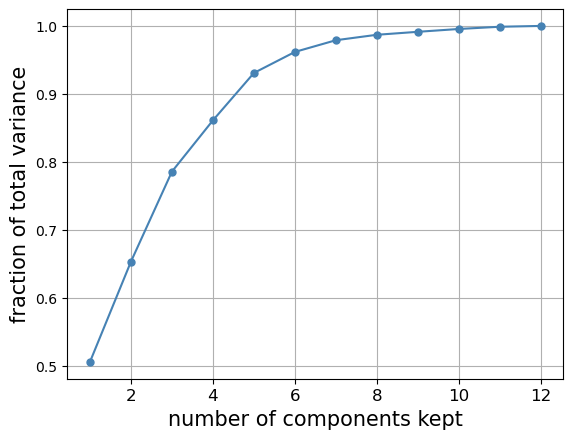

(2185987, 12)
(2185987, 8)


In [30]:
from sklearn.decomposition import PCA

X = np.transpose(data_arr)
X_reduced = PCA(n_components=8, svd_solver='full').fit_transform(X)
pca = PCA()
pca.fit(X)
variances = pca.explained_variance_
cumulative_variance = [np.sum(variances[:i+1]) for i in range(len(variances))]
print(np.array(cumulative_variance)/np.sum(variances))

print(variances)

plt.plot(np.arange(len(variances))+1, np.array(cumulative_variance)/np.sum(variances), '.-', color='steelblue', markersize=10)
plt.grid()
plt.ylabel('fraction of total variance', size=15)
plt.xlabel('number of components kept', size=15)
plt.xticks(fontsize=12)
#plt.savefig('/datax/scratch/benjb/C23_L_PCA_plot.pdf', bbox_inches='tight')
plt.show()

print(np.shape(X))
print(np.shape(X_reduced))

(100000, 12)
Making labels ...
194
Scattering ...
28163
71.83699999999999
Refining ...


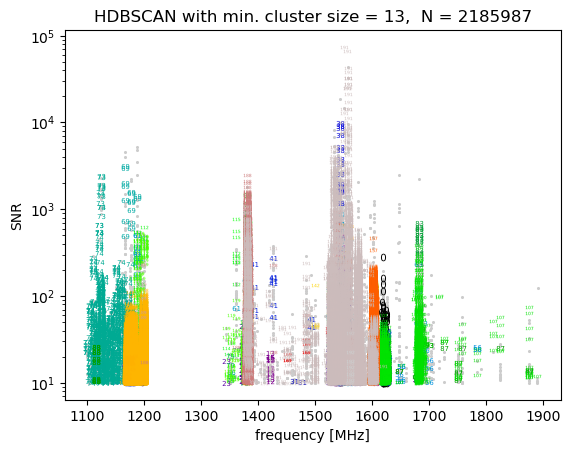

In [10]:
import matplotlib.cm as cm

nmincluster = 13
nminsamples = 2
eps = 0.1

col_idx_x = 0
col_idx_y = 2

hdb = HDBSCAN(
    min_cluster_size=nmincluster, 
    min_samples=nminsamples, 
    cluster_selection_epsilon=eps, 
    #metric = 'haversine',
    leaf_size=100,
    n_jobs=10,
    cluster_selection_method='eom')

X = np.transpose(data_arr)[:100000]
print(np.shape(X))
#hdb.fit(np.concatenate((X[:,1:], X[:,2:]), axis=1))
#hdb.fit(X[:,1:])
hdb.fit(X)
#hdb.fit(X_reduced)

print('Making labels ...')
labels_list = hdb.labels_
labels = np.unique(labels_list)
print(len(labels))

x_param = dfu.columns[col_idx_x]
y_param = dfu.columns[col_idx_y]

x = dfu[x_param].values
y = dfu[y_param].values

colors = cm.nipy_spectral(np.linspace(0, 1, len(labels)-1))

print('Scattering ...')
for l in labels:
    idxs = np.where(labels_list == l)[0]
    if l == -1.:
        plt.scatter(x[idxs], y[idxs], color='0.8', s=5, linewidths=0, label=f'n={len(idxs)}')
        print(len(idxs))
        print(100*(1-len(idxs)/len(X)))
    else:
        plt.scatter(x[idxs], y[idxs], marker=f'${l}$', color=colors[l], s=30, linewidths=0, label=f'n={len(idxs)}')

#other_idxs = np.array([683, 691])
#other_idxs = np.array([3068, 3069, 3070])
#other_idxs = np.where(labels_list==11)[0]
#other_idxs2 = np.where(labels_list==12)[0]

#plt.scatter(x[other_idxs], y[other_idxs], color='k', edgecolors='w', linewidths=0.4, s=30, marker='X')
#plt.scatter(x[other_idxs2], y[other_idxs2], color='w', edgecolors='k', s=30, marker='X')

print('Refining ...')

if 'log10' in df.columns[col_idx_x]:
    plt.xscale('log')
else:
    plt.xscale('linear')
if 'log10' in df.columns[col_idx_y]:
    plt.yscale('log')
else:
    plt.yscale('linear')

plt.xlabel(x_param)
plt.ylabel(y_param)
plt.title(f'HDBSCAN with min. cluster size = {nmincluster},  N = {len(x)}')

#leg = plt.legend(fontsize=8)
#for lh in leg.legendHandles: 
#    lh.set_alpha(1)
#    lh.set_sizes([30])
#plt.xscale('log')
#plt.yscale('log')

#plt.savefig(f'HDBSCAN_clustering_{col_idx_x}_{col_idx_y}.pdf')

plt.show()

In [12]:
import time

nmincluster = 13
nminsamples = 2
eps = 0.1

hdb = HDBSCAN(
    min_cluster_size=nmincluster, 
    min_samples=nminsamples, 
    cluster_selection_epsilon=eps, 
    #metric = 'haversine',
    leaf_size=100,
    n_jobs=10,
    cluster_selection_method='eom')

sizes = [1000, 3000, 6000, 10000, 30000, 50000, 70000, 100000]
times = []

for s in sizes:
    X = np.transpose(data_arr)[:s]
    print(np.shape(X))
    #hdb.fit(np.concatenate((X[:,1:], X[:,2:]), axis=1))
    # #hdb.fit(X[:,1:])
    start_time = time.time()
    hdb.fit(X)
    t = time.time() - start_time
    print(t)
    times.append(t)


(1000, 12)
0.06950187683105469
(3000, 12)
0.20376300811767578
(6000, 12)
0.6839437484741211
(10000, 12)
1.2488245964050293
(30000, 12)
8.833565711975098
(50000, 12)
24.474170207977295
(70000, 12)
47.25372338294983
(100000, 12)
97.57534432411194


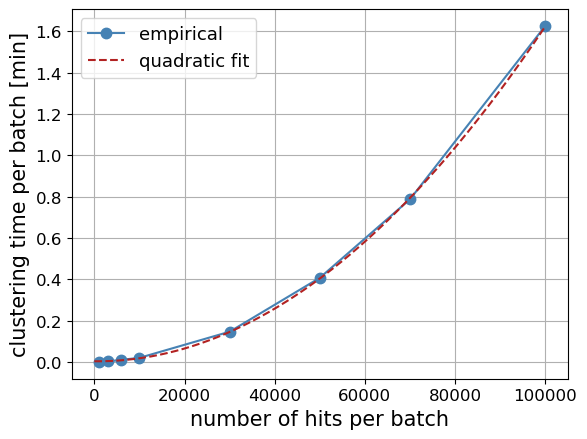

In [40]:
z = np.polyfit(sizes, np.array(times)/60, 2)
p = np.poly1d(z)

xxx = np.linspace(0,100000,1000)
ppp = p(xxx)

plt.plot(sizes, np.array(times)/60, '.-', color='steelblue', markersize=15, label='empirical')
plt.plot(xxx, ppp, '--', color='firebrick', label='quadratic fit')
plt.grid()
plt.ylabel('clustering time per batch [min]', size=15)
plt.xlabel('number of hits per batch', size=15)
plt.xticks(fontsize=12)
plt.legend(fontsize=13)
plt.yticks(fontsize=12)
#plt.savefig('/datax/scratch/benjb/C23_L_clustering_times.pdf', bbox_inches='tight')
plt.show()

In [29]:
print(f'HDBSCAN without batching would take {round(p(2185987)/60,3)} hours.')

HDBSCAN without batching would take 13.045 hours.


In [15]:
adjusted_times = [times[i]*(2.2e6)/sizes[i] for i in range(len(times))]
print(adjusted_times)

[152.9041290283203, 149.42620595296225, 250.77937444051108, 274.74141120910645, 647.7948188781738, 1076.863489151001, 1485.1170206069946, 2146.6575751304626]


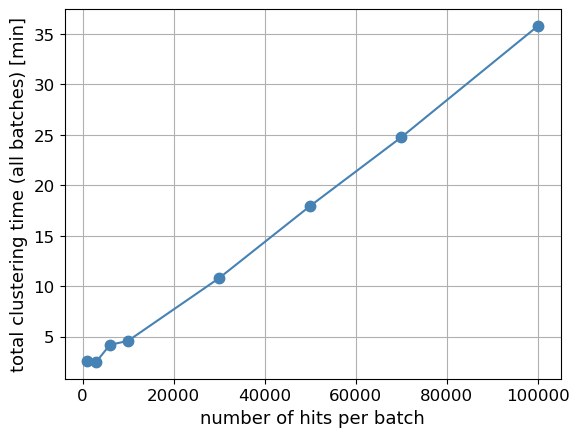

In [46]:
#tfont = {'fontname':'DejaVu Serif'}

plt.plot(sizes, np.array(adjusted_times)/60, '.-', color='steelblue', markersize=15)
plt.grid()
plt.ylabel('total clustering time (all batches) [min]', size=13)
#plt.xlabel('number of hits per batch', size=13, **tfont)
plt.xlabel('number of hits per batch', size=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.savefig('/datax/scratch/benjb/C23_L_clustering_total_times.pdf', bbox_inches='tight')
plt.show()

In [43]:
import matplotlib
matplotlib.get_cachedir()

'/home/benjb/.cache/matplotlib'